In [7]:
# Use the 20newsgroups corpus to classify short documents to categories

from sklearn.datasets import fetch_20newsgroups

# Fetch data and print the categories
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
# Use a few of these categories and get the corresponding training and test sets
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [9]:
# Print a sample
print(train.data[0])

From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)
Subject: Re: Losing your temper is not a Christian trait
Organization: Motorola LPA Development
Lines: 26

In article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com
(jcj) wrote:

> I'd like to remind people of the withering of the fig tree and Jesus
> driving the money changers et. al. out of the temple.  I think those
> were two instances of Christ showing anger (as part of His human side).
> 
Yes, and what about Paul saying:

26 Be ye angry, and sin not: let not the sun go down upon your wrath:
(Ephesians 4:26).

Obviously then, we can be angry w/o sinning.

Jon

------------------------------------------------
Jon Ogden         - jono@mac-ak-24.rtsg.mot.com
Motorola Cellular - Advanced Products Division
Voice: 708-632-2521      Data: 708-632-6086
------------------------------------------------

They drew a circle and shut him out.
Heretic, Rebel, a thing to flout.
But Love and I had the wit to win;
We drew a circle and 

In [10]:
# The first step is to concatenate the texts that belong to each of the four categories.

from collections import defaultdict

label_texts = defaultdict(str)

for i, text in enumerate(train['data']):
    label = train['target_names'][train['target'][i]]
    label_texts[label] += ' ' + text.lower()

In [11]:
# The next step is to compress each of these big texts and measure the size of the compressed result.

import gzip

METHOD = gzip

original_sizes = {
    label: len(METHOD.compress(text.encode()))
    for label, text in label_texts.items()
}

print(original_sizes)

{'soc.religion.christian': 515611, 'sci.space': 454547, 'comp.graphics': 339370, 'talk.religion.misc': 318662}


In [13]:
# We just need to compare the obtained sizes with the original and return the label 
# for which the size increased the least.

import tqdm

predictions = []
for text in tqdm.tqdm(test['data']):

    sizes = {
        label: len(METHOD.compress(f'{label_text} {text.lower()}'.encode()))
        for label, label_text in label_texts.items()
    }

    predicted_label = min(
        sizes,
        key=lambda label: sizes[label] - original_sizes[label]
    )

    predictions.append(predicted_label)

100%|██████████| 1432/1432 [03:48<00:00,  6.27it/s]


In [14]:
from sklearn.metrics import classification_report

test_labels = [
    test['target_names'][label]
    for label in test['target']
]

print(classification_report(
    test_labels,
    predictions,
    digits=3
))

                        precision    recall  f1-score   support

         comp.graphics      0.820     0.853     0.836       389
             sci.space      0.872     0.779     0.823       394
soc.religion.christian      0.790     0.897     0.840       398
    talk.religion.misc      0.605     0.538     0.570       251

              accuracy                          0.790      1432
             macro avg      0.772     0.767     0.767      1432
          weighted avg      0.788     0.790     0.787      1432



Text(89.133125, 0.5, 'predicted label')

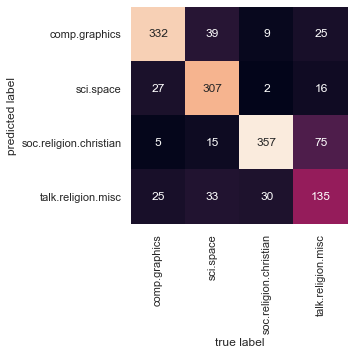

In [15]:
# Get an idea of the performance using the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

matrix = confusion_matrix(test_labels, predictions)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')